### Documentation: https://praw.readthedocs.io/en/latest/ 

In [2]:
pip install praw

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for prawcore<3,>=2.1 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ------------------------------ --------- 143.4/191.0 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/151.4 kB ? eta -:--:--
   --------------- ----------------------- 61.4/151.4 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
key_df = pd.read_csv('/Users/troys/OneDrive/Documents/Python/BeeEye/api_keys.csv')

In [15]:
reddit_client_secret = key_df.loc[key_df['API'] == 'reddit']['KEY'].iloc[0]

In [16]:
reddit_client_id = key_df.loc[key_df['API'] == 'reddit']['CLIENT_ID'].iloc[0]

In [17]:
reddit_user_agent = 'YOUR_USER_AGENT'

In [99]:
import praw
from datetime import datetime

def reddit_api_to_dataframe(subreddit_name):
    # Create a Reddit instance
    reddit = praw.Reddit(client_id=reddit_client_id,
                         client_secret=reddit_client_secret,
                         user_agent=reddit_user_agent)

    try:
        # Get the subreddit
        subreddit = reddit.subreddit(subreddit_name)

        # Create a list to store post information
        post_data = []

        # Fetch top posts using the subreddit.top method without specifying a limit
        posts = subreddit.top(time_filter='all', limit=None)

        # Store information about each post in the list
        for post in posts:
            post_data.append({
                "Title": post.title,
                "Score": post.score,
                "URL": post.url,
                "Comments": post.num_comments,
                "Body": post.selftext,  # Include the body of the post
                "Post Date": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
            })

        # Create a DataFrame from the list
        df = pd.DataFrame(post_data)

        # Group by both "Title" and "Body" and take the max comments for each group
        grouped_df = df.groupby(["Title", "Body"]).agg({
            "Score": "first",       # Take the first score encountered
            "URL": "first",         # Take the first URL encountered
            "Comments": "max",      # Take the max comments for each group
            "Post Date": "first"    # Take the first post date encountered
        }).reset_index()

        return grouped_df  # Return the DataFrame

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

if __name__ == "__main__":
    subreddit_name = 'Coffee'  # Change this to the subreddit you want to explore

    # Call the function and store the returned DataFrame
    reddit_df = reddit_api_to_dataframe(subreddit_name)

    # Display the DataFrame
    if reddit_df is not None:
        print(reddit_df)

        # If you want to save the DataFrame to a CSV file, uncomment the following line
        # reddit_df.to_csv('reddit_posts.csv', index=False)

                                                 Title  \
0                                 "But first, coffee"?   
1    "Do you know how to make good coffee, or shoul...   
2    "Do you want some coffee" means different thin...   
3    "The Best Way To Make Maxwell House Coffee" - ...   
4    "You're in college aren't you? Want our old es...   
..                                                 ...   
964     the proper way to drink coffee in the morning.   
965  unnecessary PSA: do not buy too-cheap-to-be-re...   
966                                     yup, i did it.   
967  ‘A Dissertation on Coffee’ from 1898 ‘Hotel Mo...   
968  “Sauna method” with Clever Dripper by Berg Wu,...   

                                                  Body  Score  \
0    Maybe I'm the only one who feels this way, but...    355   
1    Just a little anecdote from today.\n\nI'm work...    687   
2    I had a friend over who never came to my house...    751   
3                                          

In [100]:
reddit_df

,Title,Body,Score,URL,Comments,Post Date
0,"""But first, coffee""?","Maybe I'm the only one who feels this way, but...",355,https://www.reddit.com/r/Coffee/comments/bt7ht...,159,2019-05-26 12:43:48
1,"""Do you know how to make good coffee, or shoul...",Just a little anecdote from today.\n\nI'm work...,687,https://www.reddit.com/r/Coffee/comments/6w3dy...,191,2017-08-26 03:23:28
2,"""Do you want some coffee"" means different thin...",I had a friend over who never came to my house...,751,https://www.reddit.com/r/Coffee/comments/34nop...,88,2015-05-02 20:53:56
3,"""The Best Way To Make Maxwell House Coffee"" - ...",,432,https://i.redd.it/ve17ejcppgdy.jpg,58,2017-02-02 15:26:42
4,"""You're in college aren't you? Want our old es...",,328,http://imgur.com/yraE054,33,2013-12-22 08:46:09
...,...,...,...,...,...,...
964,the proper way to drink coffee in the morning.,,320,http://i.imgur.com/nvzHs.jpg,41,2012-07-13 04:22:58
965,unnecessary PSA: do not buy too-cheap-to-be-re...,Last week I was bored at work and took a chanc...,526,https://www.reddit.com/r/Coffee/comments/m98zr...,61,2021-03-20 15:14:08
966,"yup, i did it.",,323,http://imgur.com/hsWJP33,123,2015-02-28 22:40:27
967,‘A Dissertation on Coffee’ from 1898 ‘Hotel Mo...,,574,https://i.redd.it/yizya7himk891.jpg,72,2022-06-29 14:33:17


In [101]:
reddit_df["Post Date"].unique()

array(['2019-05-26 12:43:48', '2017-08-26 03:23:28',
       '2015-05-02 20:53:56', '2017-02-02 15:26:42',
       '2013-12-22 08:46:09', '2016-04-29 12:06:04',
       '2021-06-15 14:54:26', '2019-06-09 11:22:33',
       '2023-09-11 17:44:22', '2020-01-27 05:37:16',
       '2020-10-09 15:36:10', '2019-12-21 04:35:47',
       '2021-01-21 02:24:19', '2021-04-16 06:40:35',
       '2021-07-29 11:48:35', '2022-02-10 20:09:04',
       '2014-02-26 20:29:14', '2021-07-18 15:45:57',
       '2017-12-03 16:17:30', '2021-01-01 19:36:29',
       '2023-03-10 18:30:40', '2020-10-15 15:45:47',
       '2020-02-05 13:46:12', '2020-12-11 03:50:10',
       '2020-06-21 19:29:26', '2020-07-29 10:03:31',
       '2020-08-17 15:13:25', '2023-01-04 10:11:34',
       '2015-07-25 14:52:40', '2018-12-18 18:56:34',
       '2022-05-22 14:33:39', '2020-09-11 20:01:06',
       '2022-03-18 18:18:03', '2023-01-18 14:08:11',
       '2013-01-02 21:36:38', '2022-02-17 08:18:45',
       '2021-03-03 10:54:17', '2021-01-07 17:1

In [68]:
#reddit_df.to_csv('reddit_posts_top.csv', index=False)

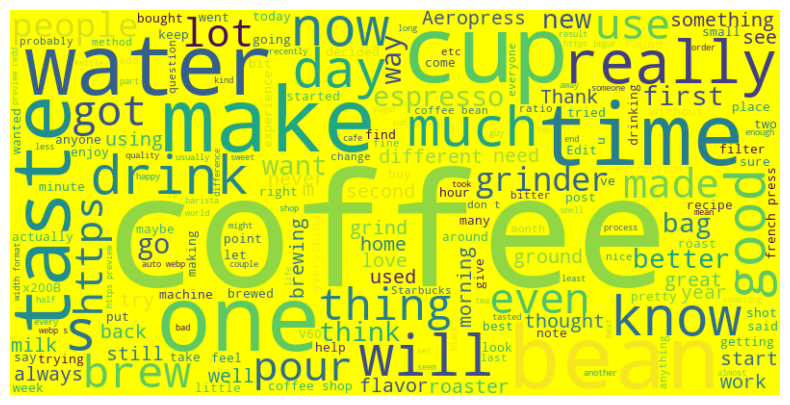

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud from the "Body" column
text = ' '.join(reddit_df['Body'].dropna())

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='yellow').generate(text)
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

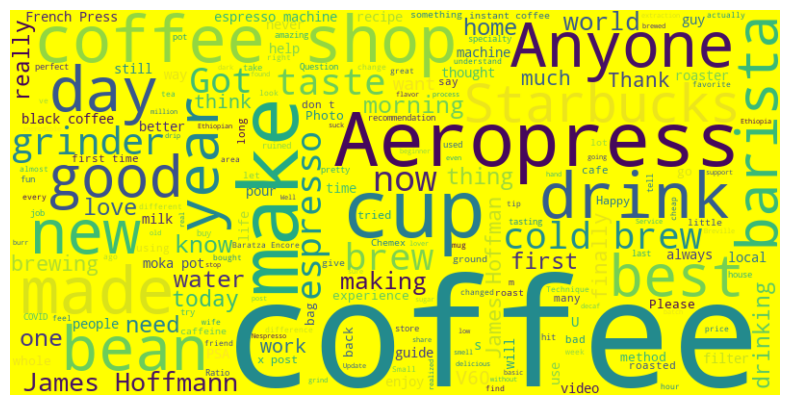

In [103]:
# Generate a word cloud from the "Body" column
text = ' '.join(reddit_df['Title'].dropna())

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='yellow').generate(text)
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [1]:
import praw
from datetime import datetime, timedelta

def reddit_api_to_dataframe(subreddit_name, num_posts=5):
    # Reddit API credentials
    reddit_client_id = 'ZC9xw2m-lUCNfub6qCQk4g'
    reddit_client_secret = 'DBzZUOYXBNkfDIbIGqzwLpk-lPeKwA'
    reddit_user_agent = 'YOUR_USER_AGENT'

    # Create a Reddit instance
    reddit = praw.Reddit(client_id=reddit_client_id,
                         client_secret=reddit_client_secret,
                         user_agent=reddit_user_agent)

    try:
        # Get the subreddit
        subreddit = reddit.subreddit(subreddit_name)

        # Calculate the time range for the past year
        now = datetime.utcnow()
        one_year_ago = now - timedelta(days=365)
        start_time = int(one_year_ago.timestamp())
        end_time = int(now.timestamp())

        # Fetch all posts within the time range using the subreddit.new method
        posts = subreddit.new(limit=None)

        # Create a list to store post information
        post_data = []

        # Filter posts based on the time range
        for post in posts:
            if start_time <= post.created_utc <= end_time:
                post_data.append({
                    "Title": post.title,
                    "Score": post.score,
                    "URL": post.url,
                    "Comments": post.num_comments,
                    "Body": post.selftext,  # Include the body of the post
                    "Post Date": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
                })

        # Create a DataFrame from the list
        df = pd.DataFrame(post_data)

        # Group by both "Title" and "Body" and take the max comments for each group
        grouped_df = df.groupby(["Title", "Body"]).agg({
            "Score": "first",       # Take the first score encountered
            "URL": "first",         # Take the first URL encountered
            "Comments": "max",      # Take the max comments for each group
            "Post Date": "first"    # Take the first post date encountered
        }).reset_index()

        return grouped_df  # Return the DataFrame

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

if __name__ == "__main__":
    subreddit_name = 'alcohol'  # Change this to the subreddit you want to explore

    # Call the function and store the returned DataFrame
    reddit_df = reddit_api_to_dataframe(subreddit_name)

    # Display the DataFrame
    if reddit_df is not None:
        print(reddit_df)

        # If you want to save the DataFrame to a CSV file, uncomment the following line
        # reddit_df.to_csv('reddit_posts.csv', index=False)


                                                 Title  \
0    " Hey maybe don't drink so early, it's only no...   
1                        "Wine & Spirits"; A Must Read   
2                                       #cheer #london   
3                                              #cheers   
4        #cheers #oktoberfest #letsgetbangin hahahahah   
..                                                 ...   
977       why didn't give me euphoria like last times?   
978     why does alcohol make everything better for me   
979                                                🍻🍻🤘   
980                                             🤘🍻👽👽👽👽   
981                                                  🥰   

                                                  Body  Score  \
0                    "Man you don't know my schedule."      6   
1    #depressants \n\nTo start, yes, I used a hasht...      0   
2                                         Enjoy folks!      4   
3    Another year older \nFinished yamazaki

In [3]:
reddit_df

,Title,Body,Score,URL,Comments,Post Date
0,""" Hey maybe don't drink so early, it's only no...","""Man you don't know my schedule.""",6,https://www.reddit.com/r/alcohol/comments/17hw...,4,2023-10-27 20:37:43
1,"""Wine & Spirits""; A Must Read","#depressants \n\nTo start, yes, I used a hasht...",0,https://www.reddit.com/r/alcohol/comments/1783...,0,2023-10-15 01:02:41
2,#cheer #london,Enjoy folks!,4,https://i.redd.it/0wxqk415muqb1.jpg,0,2023-09-27 19:20:09
3,#cheers,Another year older \nFinished yamazaki and hal...,8,https://i.redd.it/lj30i8cxh2xb1.jpg,0,2023-10-29 04:15:33
4,#cheers #oktoberfest #letsgetbangin hahahahah,Cheers people \nEnjoy,4,https://i.redd.it/ere4xvb636qb1.jpg,0,2023-09-24 08:51:07
...,...,...,...,...,...,...
977,why didn't give me euphoria like last times?,i let my homemade brew to age three weeks and ...,0,https://www.reddit.com/r/alcohol/comments/17ne...,2,2023-11-04 05:35:07
978,why does alcohol make everything better for me,man i take 1.5mg a day of kpin but can’t seem ...,4,https://www.reddit.com/r/alcohol/comments/173o...,3,2023-10-09 10:20:48
979,🍻🍻🤘,,1,https://youtu.be/HxW04PPUKao?si=0NWnkUG8scZeHw_3,0,2023-10-13 07:59:24
980,🤘🍻👽👽👽👽,,0,https://youtu.be/wIuBcb2T55Q?si=agcW9KmKC2Q0MfM_,0,2023-10-22 09:53:42


In [4]:
reddit_df["Post Date"].unique()

array(['2023-10-27 20:37:43', '2023-10-15 01:02:41',
       '2023-09-27 19:20:09', '2023-10-29 04:15:33',
       '2023-09-24 08:51:07', '2023-09-28 21:23:01',
       '2023-09-16 20:09:58', '2023-09-29 01:34:46',
       '2023-10-20 03:12:07', '2023-10-04 08:13:47',
       '2023-11-08 06:49:43', '2023-11-08 11:43:18',
       '2023-10-08 19:03:33', '2023-09-26 06:04:55',
       '2023-10-23 13:34:12', '2023-10-20 02:10:25',
       '2023-10-26 06:50:43', '2023-11-01 13:53:54',
       '2023-10-03 16:44:19', '2023-10-22 11:58:32',
       '2023-09-16 19:13:18', '2023-10-28 20:12:50',
       '2023-10-23 12:32:55', '2023-11-04 01:05:08',
       '2023-09-30 00:34:29', '2023-11-02 20:04:26',
       '2023-10-28 10:38:34', '2023-10-21 22:15:06',
       '2023-10-10 21:06:04', '2023-11-10 14:34:06',
       '2023-09-16 22:13:55', '2023-11-09 05:18:30',
       '2023-10-02 08:04:05', '2023-10-08 01:03:15',
       '2023-10-24 08:54:22', '2023-09-23 20:00:44',
       '2023-10-06 20:12:45', '2023-11-08 05:5

In [5]:
#reddit_df.to_csv('reddit_posts_new.csv', index=False)

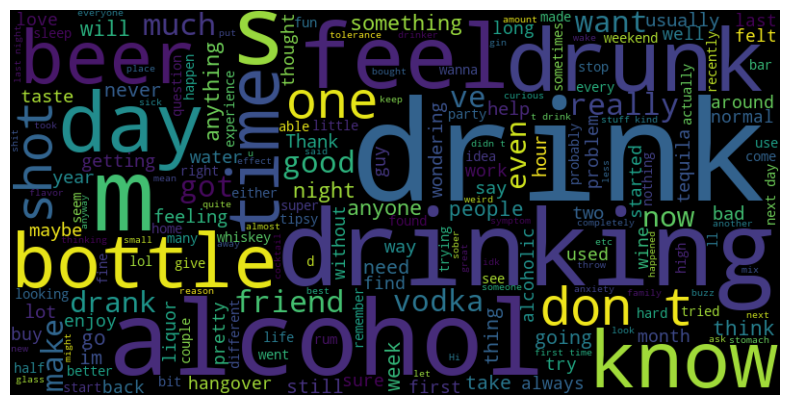

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud from the "Body" column
text = ' '.join(reddit_df['Body'].dropna())

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='black').generate(text)
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

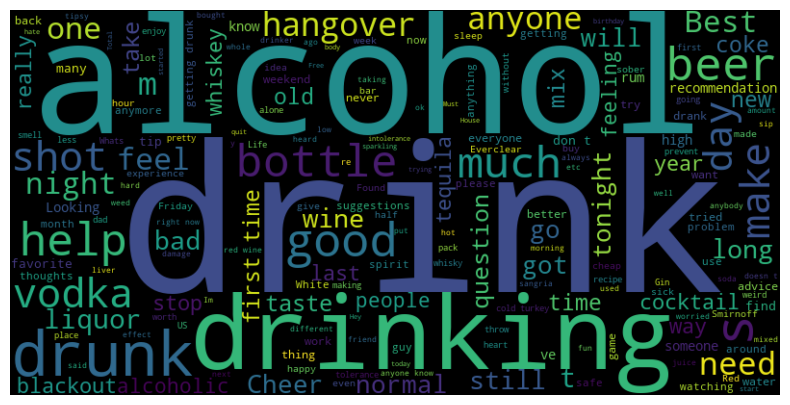

In [8]:
# Generate a word cloud from the "Body" column
text = ' '.join(reddit_df['Title'].dropna())

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='black').generate(text)
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()